## Run a single example of the calibration for a certain set of parameters

  7.379919 seconds (13.59 M allocations: 671.447 MiB, 1.86% gc time)
  0.009701 seconds (228.15 k allocations: 5.990 MiB)
  0.008443 seconds (228.15 k allocations: 5.990 MiB)


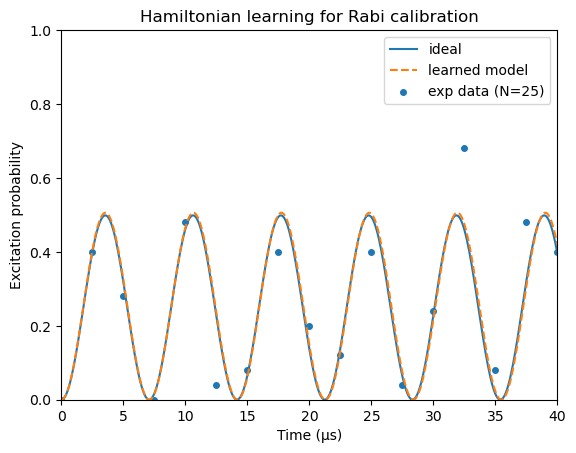

ideal fit parameters θ₁=0.6269, θ₂=0.6283
learned fit parameters θ₁=0.6299, θ₂=0.6223
fit parameters relative error=0.0071


In [1]:
include("rabi_calibration.jl")
import PyPlot
const plt = PyPlot;

detuning = 100e3
pi_time = 5
initial_guess = [0.7, 0.3]
tspan_ideal = 0:0.1:40

N = 25
tspan_experiment = 0:2.5:40

res = rabi_calibration(detuning, pi_time, initial_guess, N, tspan_ideal, tspan_experiment)

ideal = res["ideal_curve"]
ideal_fit_params = res["ideal_fit_params"]
experimental = res["experimental_data"]
learned = res["learned_curve"]
learned_fit_params = res["learned_fit_params"]

mean_error = mean(abs.(ideal_fit_params - learned_fit_params))
relative_error = mean_error / mean(ideal_fit_params)

plt.figure()
plt.plot(tspan_ideal, ideal, "-", label="ideal")
plt.scatter(tspan_experiment, experimental, label="exp data (N=$(N))", s=16)
plt.plot(tspan_ideal, learned, "--", label="learned model")

println("ideal fit parameters θ₁=$(round(ideal_fit_params[1]; digits=4)), θ₂=$(round(ideal_fit_params[2]; digits=4))")
println("learned fit parameters θ₁=$(round(learned_fit_params[1]; digits=4)), θ₂=$(round(learned_fit_params[2]; digits=4))")
println("fit parameters relative error=$(round(relative_error; digits=4))")

plt.title("Hamiltonian learning for Rabi calibration")
plt.xlim(tspan_ideal[1], tspan_ideal[end])
plt.ylim(0, 1)
plt.xlabel("Time (μs)")
plt.ylabel("Excitation probability")
plt.legend();

## Test the average error of the technique as a function of N

In [2]:
include("rabi_calibration.jl")

n_repetitions = 100
n_shots_list = [5, 10, 25, 50, 100, 250, 500, 1000]

relative_error_results = Dict()
fidelities = Dict()
for n_shots in n_shots_list 
    relative_error_results[n_shots] = []
    fidelities[n_shots] = []
    for i = 1:n_repetitions
        actual_detuning = 100e3
        actual_pi_time = 5
        initial_guess = [0.7, 0.3]
        tspan_ideal = 0:0.1:40
        tspan_experiment = 0:2.5:40
        res = rabi_calibration(actual_detuning, actual_pi_time, initial_guess, n_shots, tspan_ideal, tspan_experiment)

        ideal = res["ideal_curve"]
        ideal_fit_params = res["ideal_fit_params"]
        experimental = res["experimental_data"]
        learned = res["learned_curve"]
        learned_fit_params = res["learned_fit_params"]

        # calculate relative error in learned fit parameters
        mean_error = mean(abs.(ideal_fit_params - learned_fit_params))
        relative_error = mean_error / mean(ideal_fit_params)
        push!(relative_error_results[n_shots], relative_error)
        
        # calculate the resulting error in X-gate fidelity
        learned_pi_time = actual_pi_time / (ideal_fit_params[1] / learned_fit_params[1])
        learned_detuning = actual_detuning * (ideal_fit_params[2] / learned_fit_params[2])
        fidelity = rabi_fidelity(actual_detuning, actual_pi_time, learned_detuning, learned_pi_time)
        push!(fidelities[n_shots], fidelity)
    end
end

  0.008638 seconds (228.92 k allocations: 6.195 MiB)
  0.008259 seconds (228.15 k allocations: 5.990 MiB)
  0.008398 seconds (228.15 k allocations: 5.990 MiB)
  0.009308 seconds (41.01 k allocations: 1.220 MiB)
  0.009311 seconds (228.92 k allocations: 6.195 MiB)
  0.008833 seconds (228.15 k allocations: 5.990 MiB)
  0.008784 seconds (228.15 k allocations: 5.990 MiB)
  0.001566 seconds (35.83 k allocations: 974.453 KiB)
  0.009488 seconds (228.92 k allocations: 6.195 MiB)
  0.009340 seconds (228.15 k allocations: 5.990 MiB)
  0.009157 seconds (228.15 k allocations: 5.990 MiB)
  0.001395 seconds (32.30 k allocations: 879.953 KiB)
  0.009427 seconds (228.92 k allocations: 6.195 MiB)
  0.040040 seconds (228.15 k allocations: 5.990 MiB, 72.30% gc time)
  0.012938 seconds (228.15 k allocations: 5.990 MiB)
  0.001315 seconds (31.42 k allocations: 856.328 KiB)
  0.009545 seconds (228.92 k allocations: 6.195 MiB)
  0.009182 seconds (228.15 k allocations: 5.990 MiB)
  0.009712 seconds (228.15 k

  0.000864 seconds (19.95 k allocations: 549.203 KiB)
  0.009458 seconds (228.92 k allocations: 6.195 MiB)
  0.009298 seconds (228.15 k allocations: 5.990 MiB)
  0.009236 seconds (228.15 k allocations: 5.990 MiB)
  0.001607 seconds (35.83 k allocations: 974.453 KiB)
  0.010328 seconds (228.92 k allocations: 6.195 MiB)
  0.009642 seconds (228.15 k allocations: 5.990 MiB)
  0.009295 seconds (228.15 k allocations: 5.990 MiB)
  0.001194 seconds (22.60 k allocations: 620.078 KiB)
  0.034637 seconds (228.92 k allocations: 6.195 MiB, 71.12% gc time)
  0.008672 seconds (228.15 k allocations: 5.990 MiB)
  0.008537 seconds (228.15 k allocations: 5.990 MiB)
  0.001075 seconds (25.25 k allocations: 690.953 KiB)
  0.009513 seconds (228.92 k allocations: 6.195 MiB)
  0.009243 seconds (228.15 k allocations: 5.990 MiB)
  0.009002 seconds (228.15 k allocations: 5.990 MiB)
  0.001249 seconds (30.54 k allocations: 832.703 KiB)
  0.009050 seconds (228.92 k allocations: 6.195 MiB)
  0.008625 seconds (228.1

  0.000916 seconds (20.84 k allocations: 572.828 KiB)
  0.009153 seconds (228.92 k allocations: 6.195 MiB)
  0.008657 seconds (228.15 k allocations: 5.990 MiB)
  0.008287 seconds (228.15 k allocations: 5.990 MiB)
  0.001309 seconds (30.54 k allocations: 832.703 KiB)
  0.009647 seconds (228.92 k allocations: 6.195 MiB)
  0.009276 seconds (228.15 k allocations: 5.990 MiB)
  0.008975 seconds (228.15 k allocations: 5.990 MiB)
  0.001304 seconds (31.42 k allocations: 856.328 KiB)
  0.009312 seconds (228.92 k allocations: 6.195 MiB)
  0.008637 seconds (228.15 k allocations: 5.990 MiB)
  0.008300 seconds (228.15 k allocations: 5.990 MiB)
  0.001527 seconds (36.71 k allocations: 998.078 KiB)
  0.010044 seconds (228.92 k allocations: 6.195 MiB)
  0.009189 seconds (228.15 k allocations: 5.990 MiB)
  0.008986 seconds (228.15 k allocations: 5.990 MiB)
  0.000795 seconds (18.19 k allocations: 501.953 KiB)
  0.008993 seconds (228.92 k allocations: 6.195 MiB)
  0.008576 seconds (228.15 k allocations:

  0.001558 seconds (35.83 k allocations: 974.453 KiB)
  0.009600 seconds (228.92 k allocations: 6.195 MiB)
  0.009364 seconds (228.15 k allocations: 5.990 MiB)
  0.008933 seconds (228.15 k allocations: 5.990 MiB)
  0.001320 seconds (32.30 k allocations: 879.953 KiB)
  0.008973 seconds (228.92 k allocations: 6.195 MiB)
  0.008538 seconds (228.15 k allocations: 5.990 MiB)
  0.008226 seconds (228.15 k allocations: 5.990 MiB)
  0.001452 seconds (34.95 k allocations: 950.828 KiB)
  0.009982 seconds (228.92 k allocations: 6.195 MiB)
  0.009221 seconds (228.15 k allocations: 5.990 MiB)
  0.008942 seconds (228.15 k allocations: 5.990 MiB)
  0.001453 seconds (34.95 k allocations: 950.828 KiB)
  0.009062 seconds (228.92 k allocations: 6.195 MiB)
  0.008672 seconds (228.15 k allocations: 5.990 MiB)
  0.008236 seconds (228.15 k allocations: 5.990 MiB)
  0.001460 seconds (34.95 k allocations: 950.828 KiB)
  0.009441 seconds (228.92 k allocations: 6.195 MiB)
  0.009193 seconds (228.15 k allocations:

  0.001381 seconds (34.95 k allocations: 950.828 KiB)
  0.008917 seconds (228.92 k allocations: 6.195 MiB)
  0.008499 seconds (228.15 k allocations: 5.990 MiB)
  0.008326 seconds (228.15 k allocations: 5.990 MiB)
  0.001350 seconds (32.30 k allocations: 879.953 KiB)
  0.009612 seconds (228.92 k allocations: 6.195 MiB)
  0.009048 seconds (228.15 k allocations: 5.990 MiB)
  0.008829 seconds (228.15 k allocations: 5.990 MiB)
  0.001462 seconds (35.83 k allocations: 974.453 KiB)
  0.008980 seconds (228.92 k allocations: 6.195 MiB)
  0.008515 seconds (228.15 k allocations: 5.990 MiB)
  0.008461 seconds (228.15 k allocations: 5.990 MiB)
  0.001304 seconds (32.30 k allocations: 879.953 KiB)
  0.009460 seconds (228.92 k allocations: 6.195 MiB)
  0.009215 seconds (228.15 k allocations: 5.990 MiB)
  0.009005 seconds (228.15 k allocations: 5.990 MiB)
  0.001526 seconds (38.48 k allocations: 1.021 MiB)
  0.009231 seconds (228.92 k allocations: 6.195 MiB)
  0.008941 seconds (228.15 k allocations: 5

  0.001551 seconds (34.95 k allocations: 950.828 KiB)
  0.009453 seconds (228.92 k allocations: 6.195 MiB)
  0.009251 seconds (228.15 k allocations: 5.990 MiB)
  0.008954 seconds (228.15 k allocations: 5.990 MiB)
  0.001425 seconds (34.95 k allocations: 950.828 KiB)
  0.033851 seconds (228.92 k allocations: 6.195 MiB, 72.84% gc time)
  0.008612 seconds (228.15 k allocations: 5.990 MiB)
  0.008363 seconds (228.15 k allocations: 5.990 MiB)
  0.001332 seconds (34.95 k allocations: 950.828 KiB)
  0.009255 seconds (228.92 k allocations: 6.195 MiB)
  0.009094 seconds (228.15 k allocations: 5.990 MiB)
  0.008949 seconds (228.15 k allocations: 5.990 MiB)
  0.001259 seconds (31.42 k allocations: 856.328 KiB)
  0.009234 seconds (228.92 k allocations: 6.195 MiB)
  0.009142 seconds (228.15 k allocations: 5.990 MiB)
  0.035061 seconds (228.15 k allocations: 5.990 MiB, 74.63% gc time)
  0.001181 seconds (30.54 k allocations: 832.703 KiB)
  0.008774 seconds (228.92 k allocations: 6.195 MiB)
  0.00855

  0.001400 seconds (32.30 k allocations: 879.953 KiB)
  0.009756 seconds (228.92 k allocations: 6.195 MiB)
  0.009498 seconds (228.15 k allocations: 5.990 MiB)
  0.009629 seconds (228.15 k allocations: 5.990 MiB)
  0.001465 seconds (34.95 k allocations: 950.828 KiB)
  0.009675 seconds (228.92 k allocations: 6.195 MiB)
  0.033924 seconds (228.15 k allocations: 5.990 MiB, 73.50% gc time)
  0.008640 seconds (228.15 k allocations: 5.990 MiB)
  0.001317 seconds (33.19 k allocations: 903.578 KiB)
  0.008708 seconds (228.92 k allocations: 6.195 MiB)
  0.008494 seconds (228.15 k allocations: 5.990 MiB)
  0.008896 seconds (228.15 k allocations: 5.990 MiB)
  0.001407 seconds (33.19 k allocations: 903.578 KiB)
  0.009644 seconds (228.92 k allocations: 6.195 MiB)
  0.009264 seconds (228.15 k allocations: 5.990 MiB)
  0.009024 seconds (228.15 k allocations: 5.990 MiB)
  0.001291 seconds (33.19 k allocations: 903.578 KiB)
  0.008848 seconds (228.92 k allocations: 6.195 MiB)
  0.008535 seconds (228.1

  0.001499 seconds (34.07 k allocations: 927.203 KiB)
  0.009756 seconds (228.92 k allocations: 6.195 MiB)
  0.009556 seconds (228.15 k allocations: 5.990 MiB)
  0.009445 seconds (228.15 k allocations: 5.990 MiB)
  0.001466 seconds (34.07 k allocations: 927.203 KiB)
  0.009675 seconds (228.92 k allocations: 6.195 MiB)
  0.009522 seconds (228.15 k allocations: 5.990 MiB)
  0.009342 seconds (228.15 k allocations: 5.990 MiB)
  0.001356 seconds (34.95 k allocations: 950.828 KiB)
  0.009145 seconds (228.92 k allocations: 6.195 MiB)
  0.008589 seconds (228.15 k allocations: 5.990 MiB)
  0.008173 seconds (228.15 k allocations: 5.990 MiB)
  0.001060 seconds (24.36 k allocations: 667.328 KiB)
  0.009549 seconds (228.92 k allocations: 6.195 MiB)
  0.009308 seconds (228.15 k allocations: 5.990 MiB)
  0.009057 seconds (228.15 k allocations: 5.990 MiB)
  0.001454 seconds (34.95 k allocations: 950.828 KiB)
  0.009017 seconds (228.92 k allocations: 6.195 MiB)
  0.008551 seconds (228.15 k allocations:

  0.001332 seconds (33.19 k allocations: 903.578 KiB)
  0.009242 seconds (228.92 k allocations: 6.195 MiB)
  0.009096 seconds (228.15 k allocations: 5.990 MiB)
  0.008820 seconds (228.15 k allocations: 5.990 MiB)
  0.001297 seconds (34.07 k allocations: 927.203 KiB)
  0.008883 seconds (228.92 k allocations: 6.195 MiB)
  0.008572 seconds (228.15 k allocations: 5.990 MiB)
  0.008122 seconds (228.15 k allocations: 5.990 MiB)
  0.001469 seconds (34.07 k allocations: 927.203 KiB)
  0.009388 seconds (228.92 k allocations: 6.195 MiB)
  0.009131 seconds (228.15 k allocations: 5.990 MiB)
  0.008949 seconds (228.15 k allocations: 5.990 MiB)
  0.001418 seconds (34.07 k allocations: 927.203 KiB)
  0.010052 seconds (228.92 k allocations: 6.195 MiB)
  0.009483 seconds (228.15 k allocations: 5.990 MiB)
  0.008838 seconds (228.15 k allocations: 5.990 MiB)
  0.001339 seconds (34.95 k allocations: 950.828 KiB)
  0.008862 seconds (228.92 k allocations: 6.195 MiB)
  0.008552 seconds (228.15 k allocations:

  0.001389 seconds (34.07 k allocations: 927.203 KiB)
  0.009057 seconds (228.92 k allocations: 6.195 MiB)
  0.008675 seconds (228.15 k allocations: 5.990 MiB)
  0.008226 seconds (228.15 k allocations: 5.990 MiB)
  0.001274 seconds (32.30 k allocations: 879.953 KiB)
  0.008897 seconds (228.92 k allocations: 6.195 MiB)
  0.008851 seconds (228.15 k allocations: 5.990 MiB)
  0.009247 seconds (228.15 k allocations: 5.990 MiB)
  0.001510 seconds (34.07 k allocations: 927.203 KiB)
  0.009692 seconds (228.92 k allocations: 6.195 MiB)
  0.009754 seconds (228.15 k allocations: 5.990 MiB)
  0.009224 seconds (228.15 k allocations: 5.990 MiB)
  0.001426 seconds (33.19 k allocations: 903.578 KiB)
  0.009047 seconds (228.92 k allocations: 6.195 MiB)
  0.008638 seconds (228.15 k allocations: 5.990 MiB)
  0.008390 seconds (228.15 k allocations: 5.990 MiB)
  0.001371 seconds (34.95 k allocations: 950.828 KiB)
  0.008739 seconds (228.92 k allocations: 6.195 MiB)
  0.008588 seconds (228.15 k allocations:

  0.001399 seconds (34.95 k allocations: 950.828 KiB)
  0.008789 seconds (228.92 k allocations: 6.195 MiB)
  0.008549 seconds (228.15 k allocations: 5.990 MiB)
  0.008365 seconds (228.15 k allocations: 5.990 MiB)
  0.001418 seconds (33.19 k allocations: 903.578 KiB)
  0.009341 seconds (228.92 k allocations: 6.195 MiB)
  0.009142 seconds (228.15 k allocations: 5.990 MiB)
  0.008913 seconds (228.15 k allocations: 5.990 MiB)
  0.001522 seconds (34.95 k allocations: 950.828 KiB)
  0.009332 seconds (228.92 k allocations: 6.195 MiB)
  0.035176 seconds (228.15 k allocations: 5.990 MiB, 73.59% gc time)
  0.008775 seconds (228.15 k allocations: 5.990 MiB)
  0.001231 seconds (32.30 k allocations: 879.953 KiB)
  0.008715 seconds (228.92 k allocations: 6.195 MiB)
  0.008573 seconds (228.15 k allocations: 5.990 MiB)
  0.008150 seconds (228.15 k allocations: 5.990 MiB)
  0.001431 seconds (33.19 k allocations: 903.578 KiB)
  0.009329 seconds (228.92 k allocations: 6.195 MiB)
  0.009224 seconds (228.1

  0.001386 seconds (33.19 k allocations: 903.578 KiB)
  0.009303 seconds (228.92 k allocations: 6.195 MiB)
  0.009216 seconds (228.15 k allocations: 5.990 MiB)
  0.008781 seconds (228.15 k allocations: 5.990 MiB)
  0.001354 seconds (33.19 k allocations: 903.578 KiB)
  0.009273 seconds (228.92 k allocations: 6.195 MiB)
  0.009175 seconds (228.15 k allocations: 5.990 MiB)
  0.008926 seconds (228.15 k allocations: 5.990 MiB)
  0.001341 seconds (32.30 k allocations: 879.953 KiB)
  0.008804 seconds (228.92 k allocations: 6.195 MiB)
  0.008522 seconds (228.15 k allocations: 5.990 MiB)
  0.008138 seconds (228.15 k allocations: 5.990 MiB)
  0.001333 seconds (33.19 k allocations: 903.578 KiB)
  0.008615 seconds (228.92 k allocations: 6.195 MiB)
  0.008475 seconds (228.15 k allocations: 5.990 MiB)
  0.008053 seconds (228.15 k allocations: 5.990 MiB)
  0.001429 seconds (34.07 k allocations: 927.203 KiB)
  0.009253 seconds (228.92 k allocations: 6.195 MiB)
  0.009187 seconds (228.15 k allocations:

  0.001476 seconds (34.95 k allocations: 950.828 KiB)
  0.009185 seconds (228.92 k allocations: 6.195 MiB)
  0.009285 seconds (228.15 k allocations: 5.990 MiB)
  0.010029 seconds (228.15 k allocations: 5.990 MiB)
  0.026629 seconds (33.19 k allocations: 903.578 KiB, 94.18% gc time)
  0.009159 seconds (228.92 k allocations: 6.195 MiB)
  0.008698 seconds (228.15 k allocations: 5.990 MiB)
  0.008303 seconds (228.15 k allocations: 5.990 MiB)
  0.001322 seconds (34.07 k allocations: 927.203 KiB)
  0.008825 seconds (228.92 k allocations: 6.195 MiB)
  0.008545 seconds (228.15 k allocations: 5.990 MiB)
  0.008334 seconds (228.15 k allocations: 5.990 MiB)
  0.001379 seconds (34.07 k allocations: 927.203 KiB)
  0.008751 seconds (228.92 k allocations: 6.195 MiB)
  0.009346 seconds (228.15 k allocations: 5.990 MiB)
  0.009739 seconds (228.15 k allocations: 5.990 MiB)
  0.001487 seconds (34.07 k allocations: 927.203 KiB)
  0.009584 seconds (228.92 k allocations: 6.195 MiB)
  0.009532 seconds (228.1

  0.001383 seconds (33.19 k allocations: 903.578 KiB)
  0.009353 seconds (228.92 k allocations: 6.195 MiB)
  0.035804 seconds (228.15 k allocations: 5.990 MiB, 73.87% gc time)
  0.008648 seconds (228.15 k allocations: 5.990 MiB)
  0.001348 seconds (34.07 k allocations: 927.203 KiB)
  0.008880 seconds (228.92 k allocations: 6.195 MiB)
  0.008629 seconds (228.15 k allocations: 5.990 MiB)
  0.008280 seconds (228.15 k allocations: 5.990 MiB)
  0.001276 seconds (33.19 k allocations: 903.578 KiB)
  0.008666 seconds (228.92 k allocations: 6.195 MiB)
  0.008415 seconds (228.15 k allocations: 5.990 MiB)
  0.008105 seconds (228.15 k allocations: 5.990 MiB)
  0.001414 seconds (33.19 k allocations: 903.578 KiB)
  0.010100 seconds (228.92 k allocations: 6.195 MiB)
  0.009574 seconds (228.15 k allocations: 5.990 MiB)
  0.009232 seconds (228.15 k allocations: 5.990 MiB)
  0.001521 seconds (34.07 k allocations: 927.203 KiB)
  0.009740 seconds (228.92 k allocations: 6.195 MiB)
  0.009330 seconds (228.1

  0.001470 seconds (33.19 k allocations: 903.578 KiB)
  0.009803 seconds (228.92 k allocations: 6.195 MiB)
  0.035032 seconds (228.15 k allocations: 5.990 MiB, 74.03% gc time)
  0.008642 seconds (228.15 k allocations: 5.990 MiB)
  0.001339 seconds (34.07 k allocations: 927.203 KiB)
  0.008964 seconds (228.92 k allocations: 6.195 MiB)
  0.008681 seconds (228.15 k allocations: 5.990 MiB)
  0.008183 seconds (228.15 k allocations: 5.990 MiB)
  0.001460 seconds (34.07 k allocations: 927.203 KiB)
  0.009006 seconds (228.92 k allocations: 6.195 MiB)
  0.008772 seconds (228.15 k allocations: 5.990 MiB)
  0.008148 seconds (228.15 k allocations: 5.990 MiB)
  0.001288 seconds (33.19 k allocations: 903.578 KiB)
  0.009325 seconds (228.92 k allocations: 6.195 MiB)
  0.009367 seconds (228.15 k allocations: 5.990 MiB)
  0.009037 seconds (228.15 k allocations: 5.990 MiB)
  0.001402 seconds (33.19 k allocations: 903.578 KiB)
  0.009314 seconds (228.92 k allocations: 6.195 MiB)
  0.009443 seconds (228.1

  0.001334 seconds (33.19 k allocations: 903.578 KiB)
  0.008961 seconds (228.92 k allocations: 6.195 MiB)
  0.008890 seconds (228.15 k allocations: 5.990 MiB)
  0.008359 seconds (228.15 k allocations: 5.990 MiB)
  0.001352 seconds (33.19 k allocations: 903.578 KiB)
  0.009002 seconds (228.92 k allocations: 6.195 MiB)
  0.008699 seconds (228.15 k allocations: 5.990 MiB)
  0.008277 seconds (228.15 k allocations: 5.990 MiB)
  0.001772 seconds (33.19 k allocations: 903.578 KiB)
  0.011625 seconds (228.92 k allocations: 6.195 MiB)
  0.008840 seconds (228.15 k allocations: 5.990 MiB)
  0.013315 seconds (228.15 k allocations: 5.990 MiB)
  0.001504 seconds (34.07 k allocations: 927.203 KiB)
  0.009565 seconds (228.92 k allocations: 6.195 MiB)
  0.009434 seconds (228.15 k allocations: 5.990 MiB)
  0.009249 seconds (228.15 k allocations: 5.990 MiB)
  0.001453 seconds (34.07 k allocations: 927.203 KiB)
  0.009848 seconds (228.92 k allocations: 6.195 MiB)
  0.009643 seconds (228.15 k allocations:

  0.001376 seconds (34.07 k allocations: 927.203 KiB)
  0.008783 seconds (228.92 k allocations: 6.195 MiB)
  0.008588 seconds (228.15 k allocations: 5.990 MiB)
  0.008571 seconds (228.15 k allocations: 5.990 MiB)
  0.001334 seconds (33.19 k allocations: 903.578 KiB)
  0.008855 seconds (228.92 k allocations: 6.195 MiB)
  0.008627 seconds (228.15 k allocations: 5.990 MiB)
  0.008859 seconds (228.15 k allocations: 5.990 MiB)
  0.001456 seconds (33.19 k allocations: 903.578 KiB)
  0.009710 seconds (228.92 k allocations: 6.195 MiB)
  0.009623 seconds (228.15 k allocations: 5.990 MiB)
  0.009380 seconds (228.15 k allocations: 5.990 MiB)
  0.001434 seconds (33.19 k allocations: 903.578 KiB)
  0.009654 seconds (228.92 k allocations: 6.195 MiB)
  0.009886 seconds (228.15 k allocations: 5.990 MiB)
  0.009366 seconds (228.15 k allocations: 5.990 MiB)
  0.001426 seconds (33.19 k allocations: 903.578 KiB)
  0.009812 seconds (228.92 k allocations: 6.195 MiB)
  0.036444 seconds (228.15 k allocations:

  0.001728 seconds (33.19 k allocations: 903.578 KiB)
  0.011155 seconds (228.92 k allocations: 6.195 MiB)
  0.009376 seconds (228.15 k allocations: 5.990 MiB)
  0.009411 seconds (228.15 k allocations: 5.990 MiB)
  0.001415 seconds (33.19 k allocations: 903.578 KiB)
  0.009542 seconds (228.92 k allocations: 6.195 MiB)
  0.009609 seconds (228.15 k allocations: 5.990 MiB)
  0.009283 seconds (228.15 k allocations: 5.990 MiB)
  0.001426 seconds (33.19 k allocations: 903.578 KiB)
  0.009715 seconds (228.92 k allocations: 6.195 MiB)
  0.010010 seconds (228.15 k allocations: 5.990 MiB)
  0.009246 seconds (228.15 k allocations: 5.990 MiB)
  0.001923 seconds (34.07 k allocations: 927.203 KiB)
  0.010834 seconds (228.92 k allocations: 6.195 MiB)
  0.036118 seconds (228.15 k allocations: 5.990 MiB, 73.87% gc time)
  0.008753 seconds (228.15 k allocations: 5.990 MiB)
  0.001461 seconds (34.07 k allocations: 927.203 KiB)
  0.009094 seconds (228.92 k allocations: 6.195 MiB)
  0.008706 seconds (228.1

  0.009310 seconds (228.15 k allocations: 5.990 MiB)
  0.001478 seconds (34.07 k allocations: 927.203 KiB)
  0.009715 seconds (228.92 k allocations: 6.195 MiB)
  0.009558 seconds (228.15 k allocations: 5.990 MiB)
  0.009195 seconds (228.15 k allocations: 5.990 MiB)
  0.001476 seconds (34.07 k allocations: 927.203 KiB)
  0.036143 seconds (228.92 k allocations: 6.195 MiB, 73.27% gc time)
  0.009081 seconds (228.15 k allocations: 5.990 MiB)
  0.008846 seconds (228.15 k allocations: 5.990 MiB)
  0.001415 seconds (33.19 k allocations: 903.578 KiB)
  0.009036 seconds (228.92 k allocations: 6.195 MiB)
  0.008621 seconds (228.15 k allocations: 5.990 MiB)
  0.008365 seconds (228.15 k allocations: 5.990 MiB)
  0.001394 seconds (34.07 k allocations: 927.203 KiB)
  0.008965 seconds (228.92 k allocations: 6.195 MiB)
  0.008937 seconds (228.15 k allocations: 5.990 MiB)
  0.008374 seconds (228.15 k allocations: 5.990 MiB)
  0.001340 seconds (34.07 k allocations: 927.203 KiB)
  0.008937 seconds (228.9

  0.001329 seconds (33.19 k allocations: 903.578 KiB)
  0.010858 seconds (228.92 k allocations: 6.195 MiB)
  0.009107 seconds (228.15 k allocations: 5.990 MiB)
  0.008370 seconds (228.15 k allocations: 5.990 MiB)
  0.001366 seconds (34.07 k allocations: 927.203 KiB)
  0.008933 seconds (228.92 k allocations: 6.195 MiB)
  0.008689 seconds (228.15 k allocations: 5.990 MiB)
  0.008276 seconds (228.15 k allocations: 5.990 MiB)
  0.001405 seconds (34.07 k allocations: 927.203 KiB)
  0.008831 seconds (228.92 k allocations: 6.195 MiB)
  0.008624 seconds (228.15 k allocations: 5.990 MiB)
  0.008462 seconds (228.15 k allocations: 5.990 MiB)
  0.001376 seconds (34.07 k allocations: 927.203 KiB)
  0.008814 seconds (228.92 k allocations: 6.195 MiB)
  0.008621 seconds (228.15 k allocations: 5.990 MiB)
  0.008336 seconds (228.15 k allocations: 5.990 MiB)
  0.001333 seconds (34.07 k allocations: 927.203 KiB)
  0.008874 seconds (228.92 k allocations: 6.195 MiB)
  0.008521 seconds (228.15 k allocations:

  0.001366 seconds (34.07 k allocations: 927.203 KiB)
  0.008668 seconds (228.92 k allocations: 6.195 MiB)
  0.008725 seconds (228.15 k allocations: 5.990 MiB)
  0.009056 seconds (228.15 k allocations: 5.990 MiB)
  0.001322 seconds (34.07 k allocations: 927.203 KiB)
  0.009176 seconds (228.92 k allocations: 6.195 MiB)
  0.009264 seconds (228.15 k allocations: 5.990 MiB)
  0.008917 seconds (228.15 k allocations: 5.990 MiB)
  0.001391 seconds (33.19 k allocations: 903.578 KiB)
  0.013394 seconds (228.92 k allocations: 6.195 MiB)
  0.009168 seconds (228.15 k allocations: 5.990 MiB)
  0.009000 seconds (228.15 k allocations: 5.990 MiB)
  0.001471 seconds (34.07 k allocations: 927.203 KiB)
  0.009547 seconds (228.92 k allocations: 6.195 MiB)
  0.009444 seconds (228.15 k allocations: 5.990 MiB)
  0.008889 seconds (228.15 k allocations: 5.990 MiB)
  0.001408 seconds (34.07 k allocations: 927.203 KiB)
  0.009297 seconds (228.92 k allocations: 6.195 MiB)
  0.009142 seconds (228.15 k allocations:

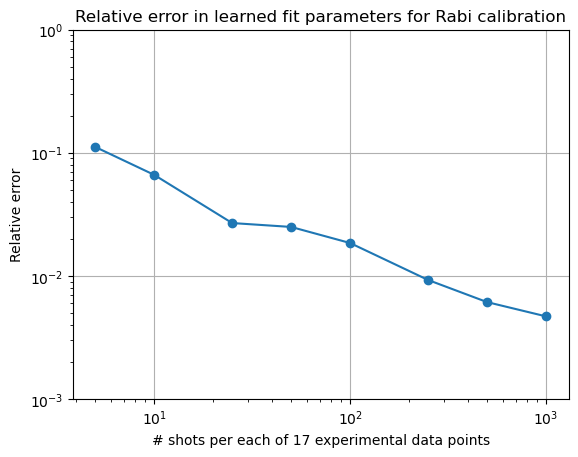

In [3]:
import PyPlot
const plt = PyPlot;

relative_error_means = []
for n_shots in n_shots_list
    push!(relative_error_means, mean(relative_error_results[n_shots]))
end

plt.figure()
plt.plot(n_shots_list, relative_error_means, "-", marker="o")

plt.title("Relative error in learned fit parameters for Rabi calibration")
plt.ylim(1e-3, 1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("# shots per each of $(length(tspan_experiment)) experimental data points")
plt.ylabel("Relative error")
plt.grid();

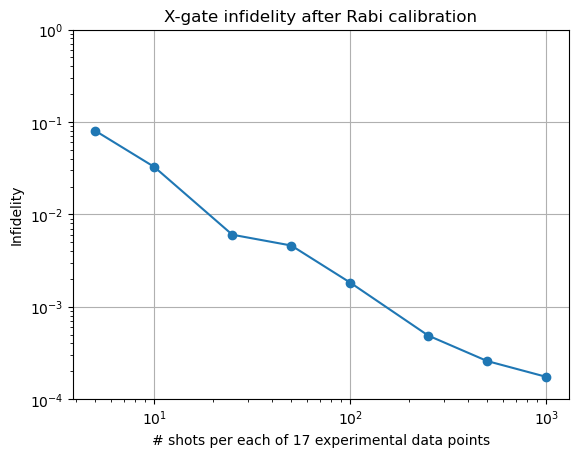

In [4]:
import PyPlot
const plt = PyPlot;

fidelity_means = []
for n_shots in n_shots_list
    push!(fidelity_means, mean(fidelities[n_shots]))
end

plt.figure()
plt.plot(n_shots_list, 1 .- fidelity_means, "-", marker="o")

plt.title("X-gate infidelity after Rabi calibration")
plt.ylim(1e-4, 1)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("# shots per each of $(length(tspan_experiment)) experimental data points")
plt.ylabel("Infidelity")
plt.grid();

## Print the raw result data

In [5]:
print(relative_error_results)

Dict{Any,Any}(25 => Any[0.0461596825868089, 0.027191107862265706, 0.01695751416375544, 0.013347097247438204, 0.008456504662199243, 0.01648805769136886, 0.005825079390111249, 0.012109033630122583, 0.027357527701271953, 0.006953152040801468, 0.006497265777809396, 0.01132625697716061, 0.10932886700018524, 0.005856316061839622, 0.0331197531426959, 0.009825022547404843, 0.06132417802031835, 0.025746474333833955, 0.008010204700595009, 0.0379759632818375, 0.0391791740420843, 0.01053186688462639, 0.0034222155956246977, 0.0037751709773582824, 0.025028661522197057, 0.008595464907396409, 0.0017487722848892496, 0.014820640175930554, 0.007849856194589902, 0.009235480308153155, 0.011568175289075649, 0.04572438950765115, 0.025827887419671052, 0.010376763469800513, 0.01790328520038126, 0.021310178165240407, 0.029143208119747716, 0.0346143131948825, 0.0386669357123892, 0.034566591906813944, 0.03825910381449594, 0.06446601817994356, 0.00861060779621389, 0.018895357189672068, 0.017227742005618895, 0.0576

, 0.0037940258681223066, 0.005021083029552653, 0.004104066011194497, 0.002540327723580085, 0.004502612759187338, 0.0003823166077635522, 0.004848257665303506, 0.0024834344202567986, 0.009035026136871988, 0.006005130501180458, 0.00471190405390064, 0.006330289818281818, 0.00027267025555293193, 0.01157517306151749, 0.0015843950453149041, 0.010262664356363619, 0.0007540248489912122, 0.008730731839729724, 0.010847793531919909, 0.011918128251256956, 0.0008216059257168321, 0.0040173979313446575, 0.006089811730482542, 0.006328197722278881, 0.005573616306424674, 0.011107869126567567, 0.0012906863994021497, 0.006292218121684502, 0.009779938189266865, 0.002393388981250458],5 => Any[0.06439613143519494, 0.06896921550138681, 0.032786198290936465, 0.21067148002526587, 0.00724718179037137, 0.0866204061926045, 0.027326523927725655, 0.13059643901187085, 0.0956218032097648, 0.08005866093547488, 0.04399424017424571, 0.2217916011855481, 0.13405081997314947, 0.029482102227326334, 0.23159242713532097, 0.0491

In [6]:
print(fidelities)

Dict{Any,Any}(25 => Any[0.9919729976699603, 0.9960719479350632, 0.9990654048747868, 0.9993838562709172, 0.9997311978883053, 0.998836062520608, 0.9998834691723222, 0.9989947244456778, 0.9970578496864781, 0.9998492821844088, 0.9997422685173583, 0.9992548795878899, 0.9540046003696986, 0.9998644359179685, 0.9964166703808395, 0.9996078155397565, 0.9871322138691411, 0.9980370944661, 0.9997081192847269, 0.9950866961571564, 0.9946889455500044, 0.9994695754419903, 0.9998565313530918, 0.9997638039323415, 0.9978851824946224, 0.999407023905057, 0.9999336685032951, 0.9990990756802631, 0.999821766627967, 0.9996263414590074, 0.9993448067832439, 0.9915788839445664, 0.9974599343094751, 0.9994953719232578, 0.9985078875845532, 0.998195918591602, 0.9971259755462689, 0.9955992482595614, 0.9952490772400381, 0.9959438780280379, 0.9947926213926014, 0.9852931218362018, 0.9997586856511864, 0.9987570046577678, 0.9981748641454912, 0.9881770129091875, 0.9981489044712957, 0.9994856085344681, 0.999623992914131, 0.99